Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Loading the dataset to a Pandas DataFrame

In [3]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

first 5 rows of the dataset

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Checking rows and columns

In [5]:
data.shape

(284807, 31)

dataset informations

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# statistical measures of the data

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


checking the number of missing values in each column

In [8]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


distribution of legit transactions & fraudulent transactions

In [9]:
class_count = data['Class'].value_counts()
print(class_count)

Class
0    284315
1       492
Name: count, dtype: int64


Distribution of Valid & Fraudulent Transactions

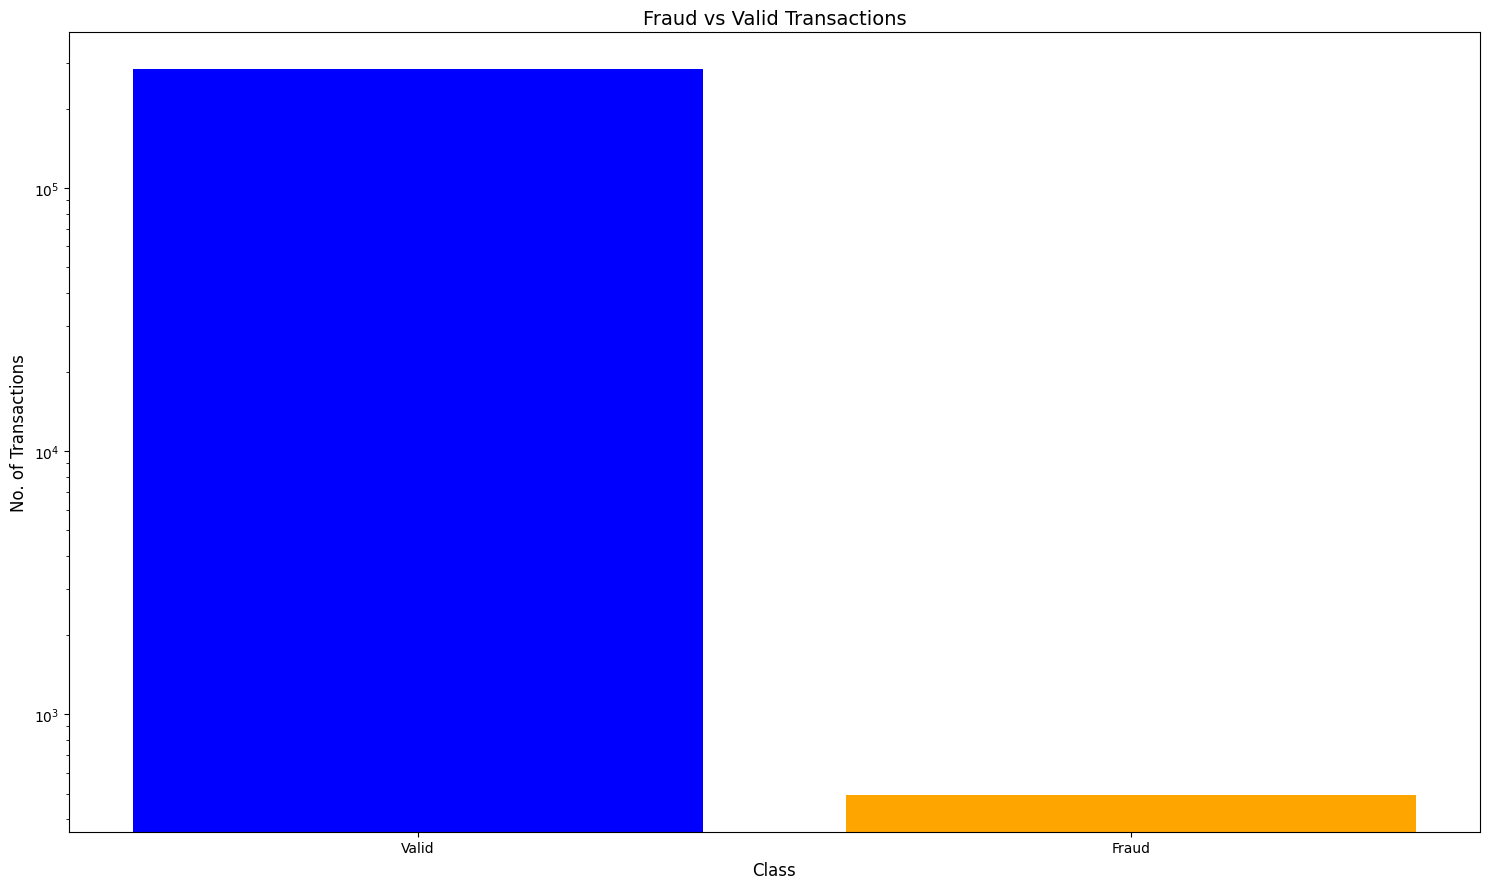

In [10]:
plt.figure(figsize=(15,9))
plt.bar(class_count.index, class_count.values, color=['blue','orange'])
plt.title('Fraud vs Valid Transactions', fontsize=14)
plt.yscale('log')
plt.xlabel('Class', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.xticks(ticks=class_count.index, labels=['Valid', 'Fraud'], fontsize=10)
plt.tight_layout()
plt.show()

Get the Fraud and the normal dataset

In [11]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [12]:
print(fraud.value_counts().sum())
print(normal.value_counts().sum())

492
284315


In [13]:
print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


We need to analyze more amount of information from the transaction data
How different are the amount of money used in different transaction classes?

In [14]:
print(fraud.Amount.describe())
# #
print(normal.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


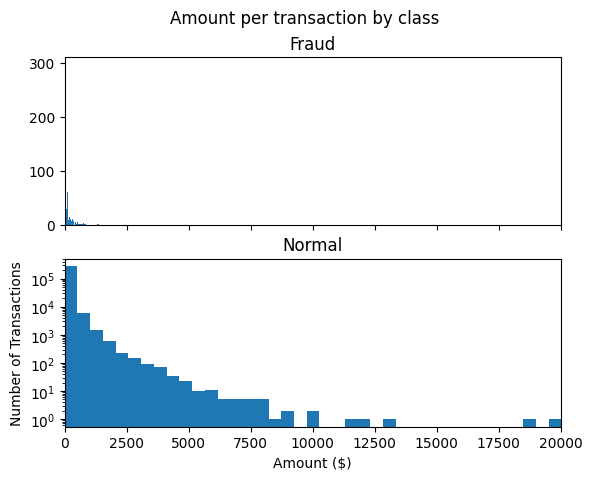

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

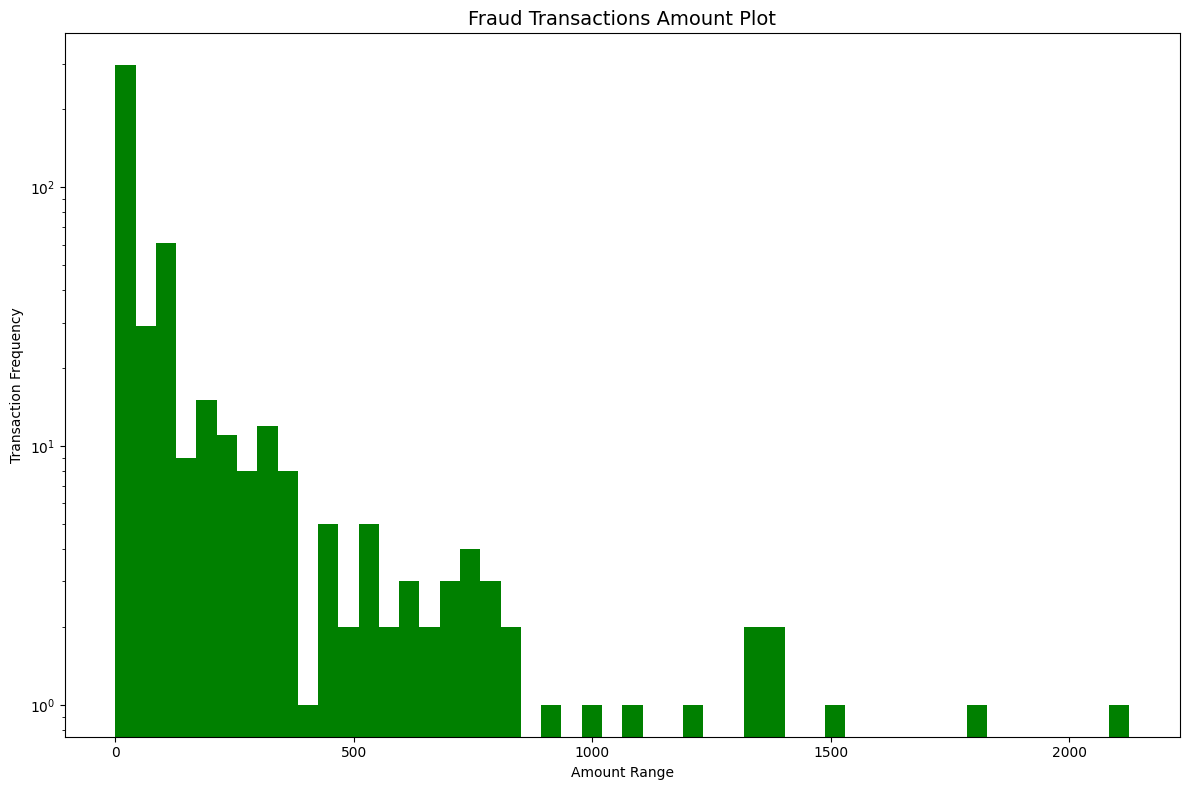

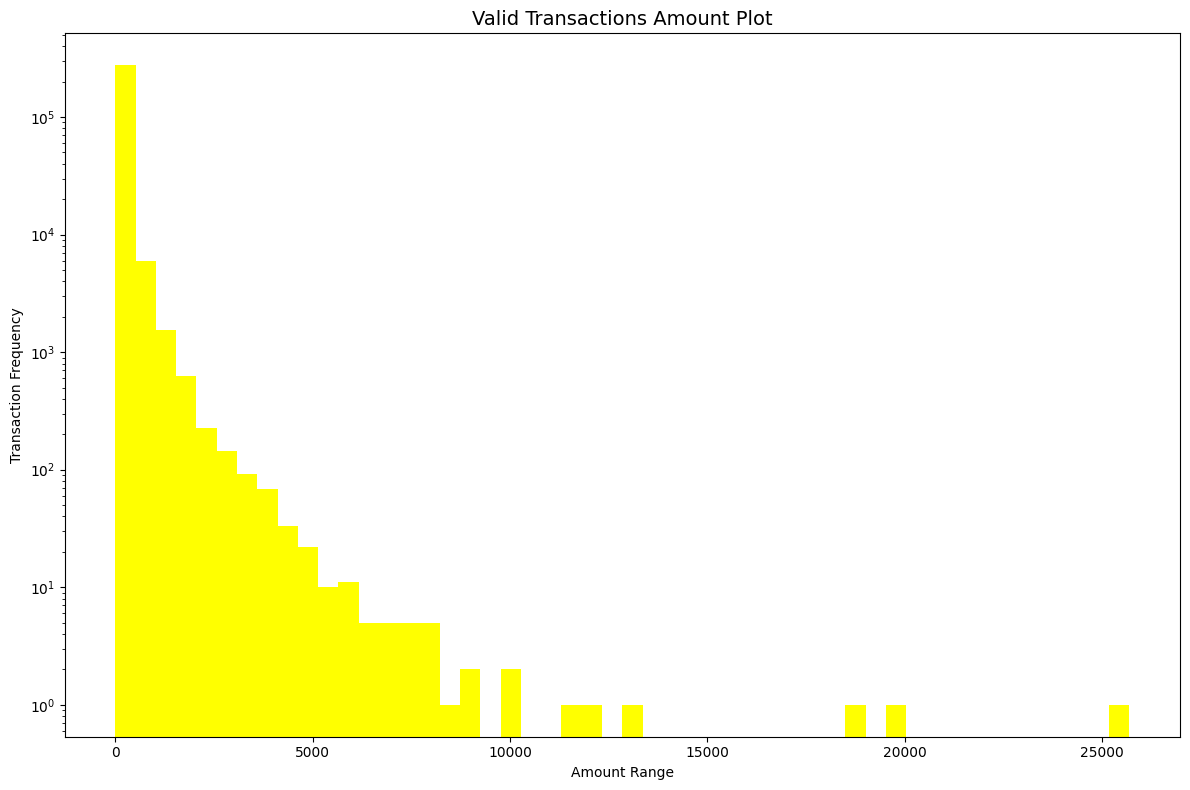

In [16]:
plt.figure(figsize=(12,8))
plt.hist(fraud['Amount'], bins=50, color='green')
plt.title('Fraud Transactions Amount Plot', fontsize=14)
plt.yscale('log')
plt.xlabel('Amount Range', fontsize=10)
plt.ylabel('Transaction Frequency', fontsize=10)
plt.tight_layout()
plt.show()
#
plt.figure(figsize=(12,8))
plt.hist(normal['Amount'], bins=50, color='yellow')
plt.title('Valid Transactions Amount Plot', fontsize=14)
plt.yscale('log')
plt.xlabel('Amount Range', fontsize=10)
plt.ylabel('Transaction Frequency', fontsize=10)
plt.tight_layout()
plt.show()

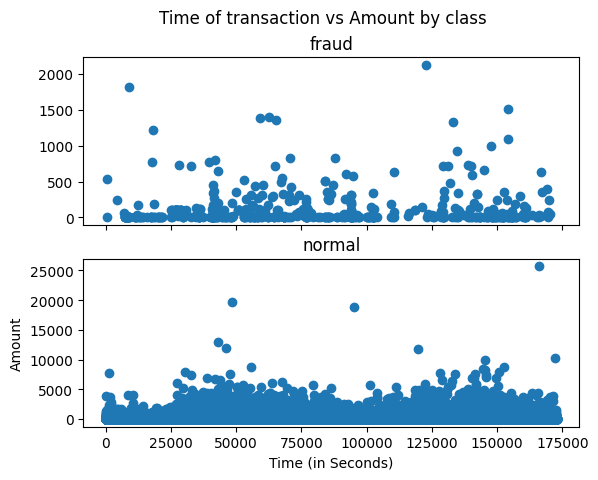

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Get correlations of each feature

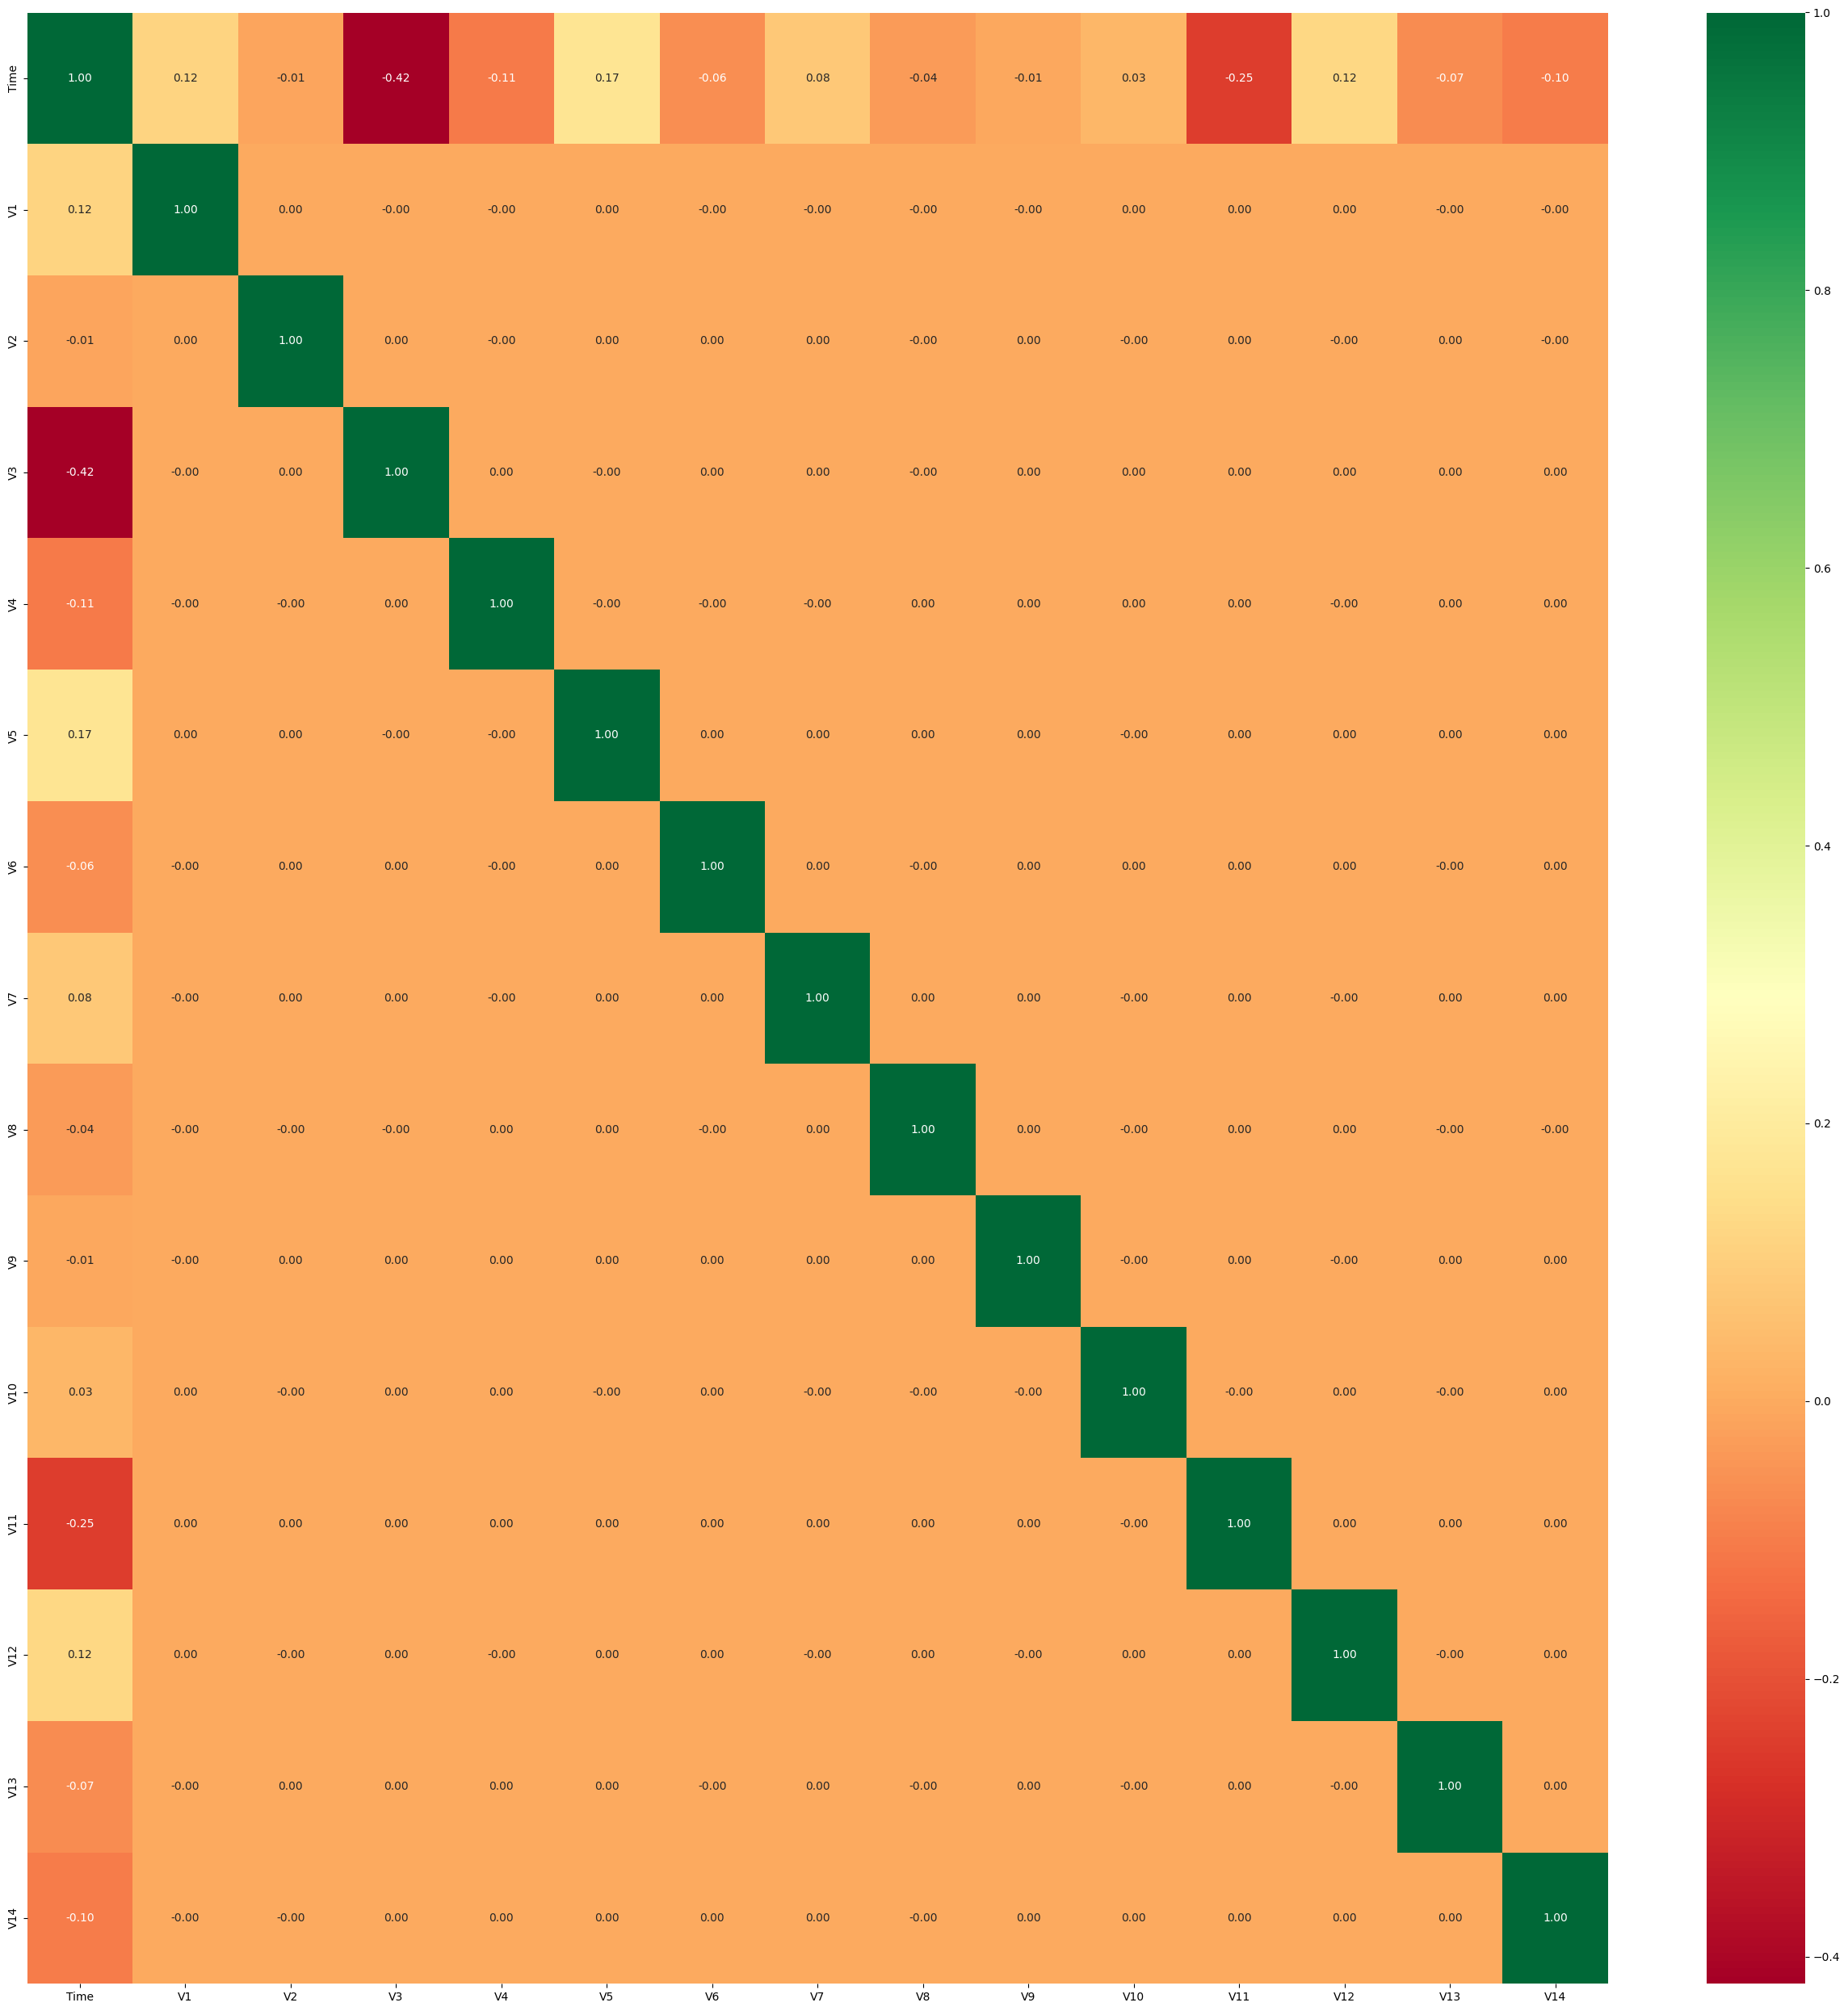

In [18]:
corrmat = data.corr()

# Select a subset of the top correlated features
top_corr_features = corrmat.index[:15]  # Adjust the number based on your dataset

# Plot heatmap for the selected features
plt.figure(figsize=(25, 25))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn", fmt=".2f", annot_kws={"size": 10})
plt.tight_layout()
plt.show()

Get correlations of each feature

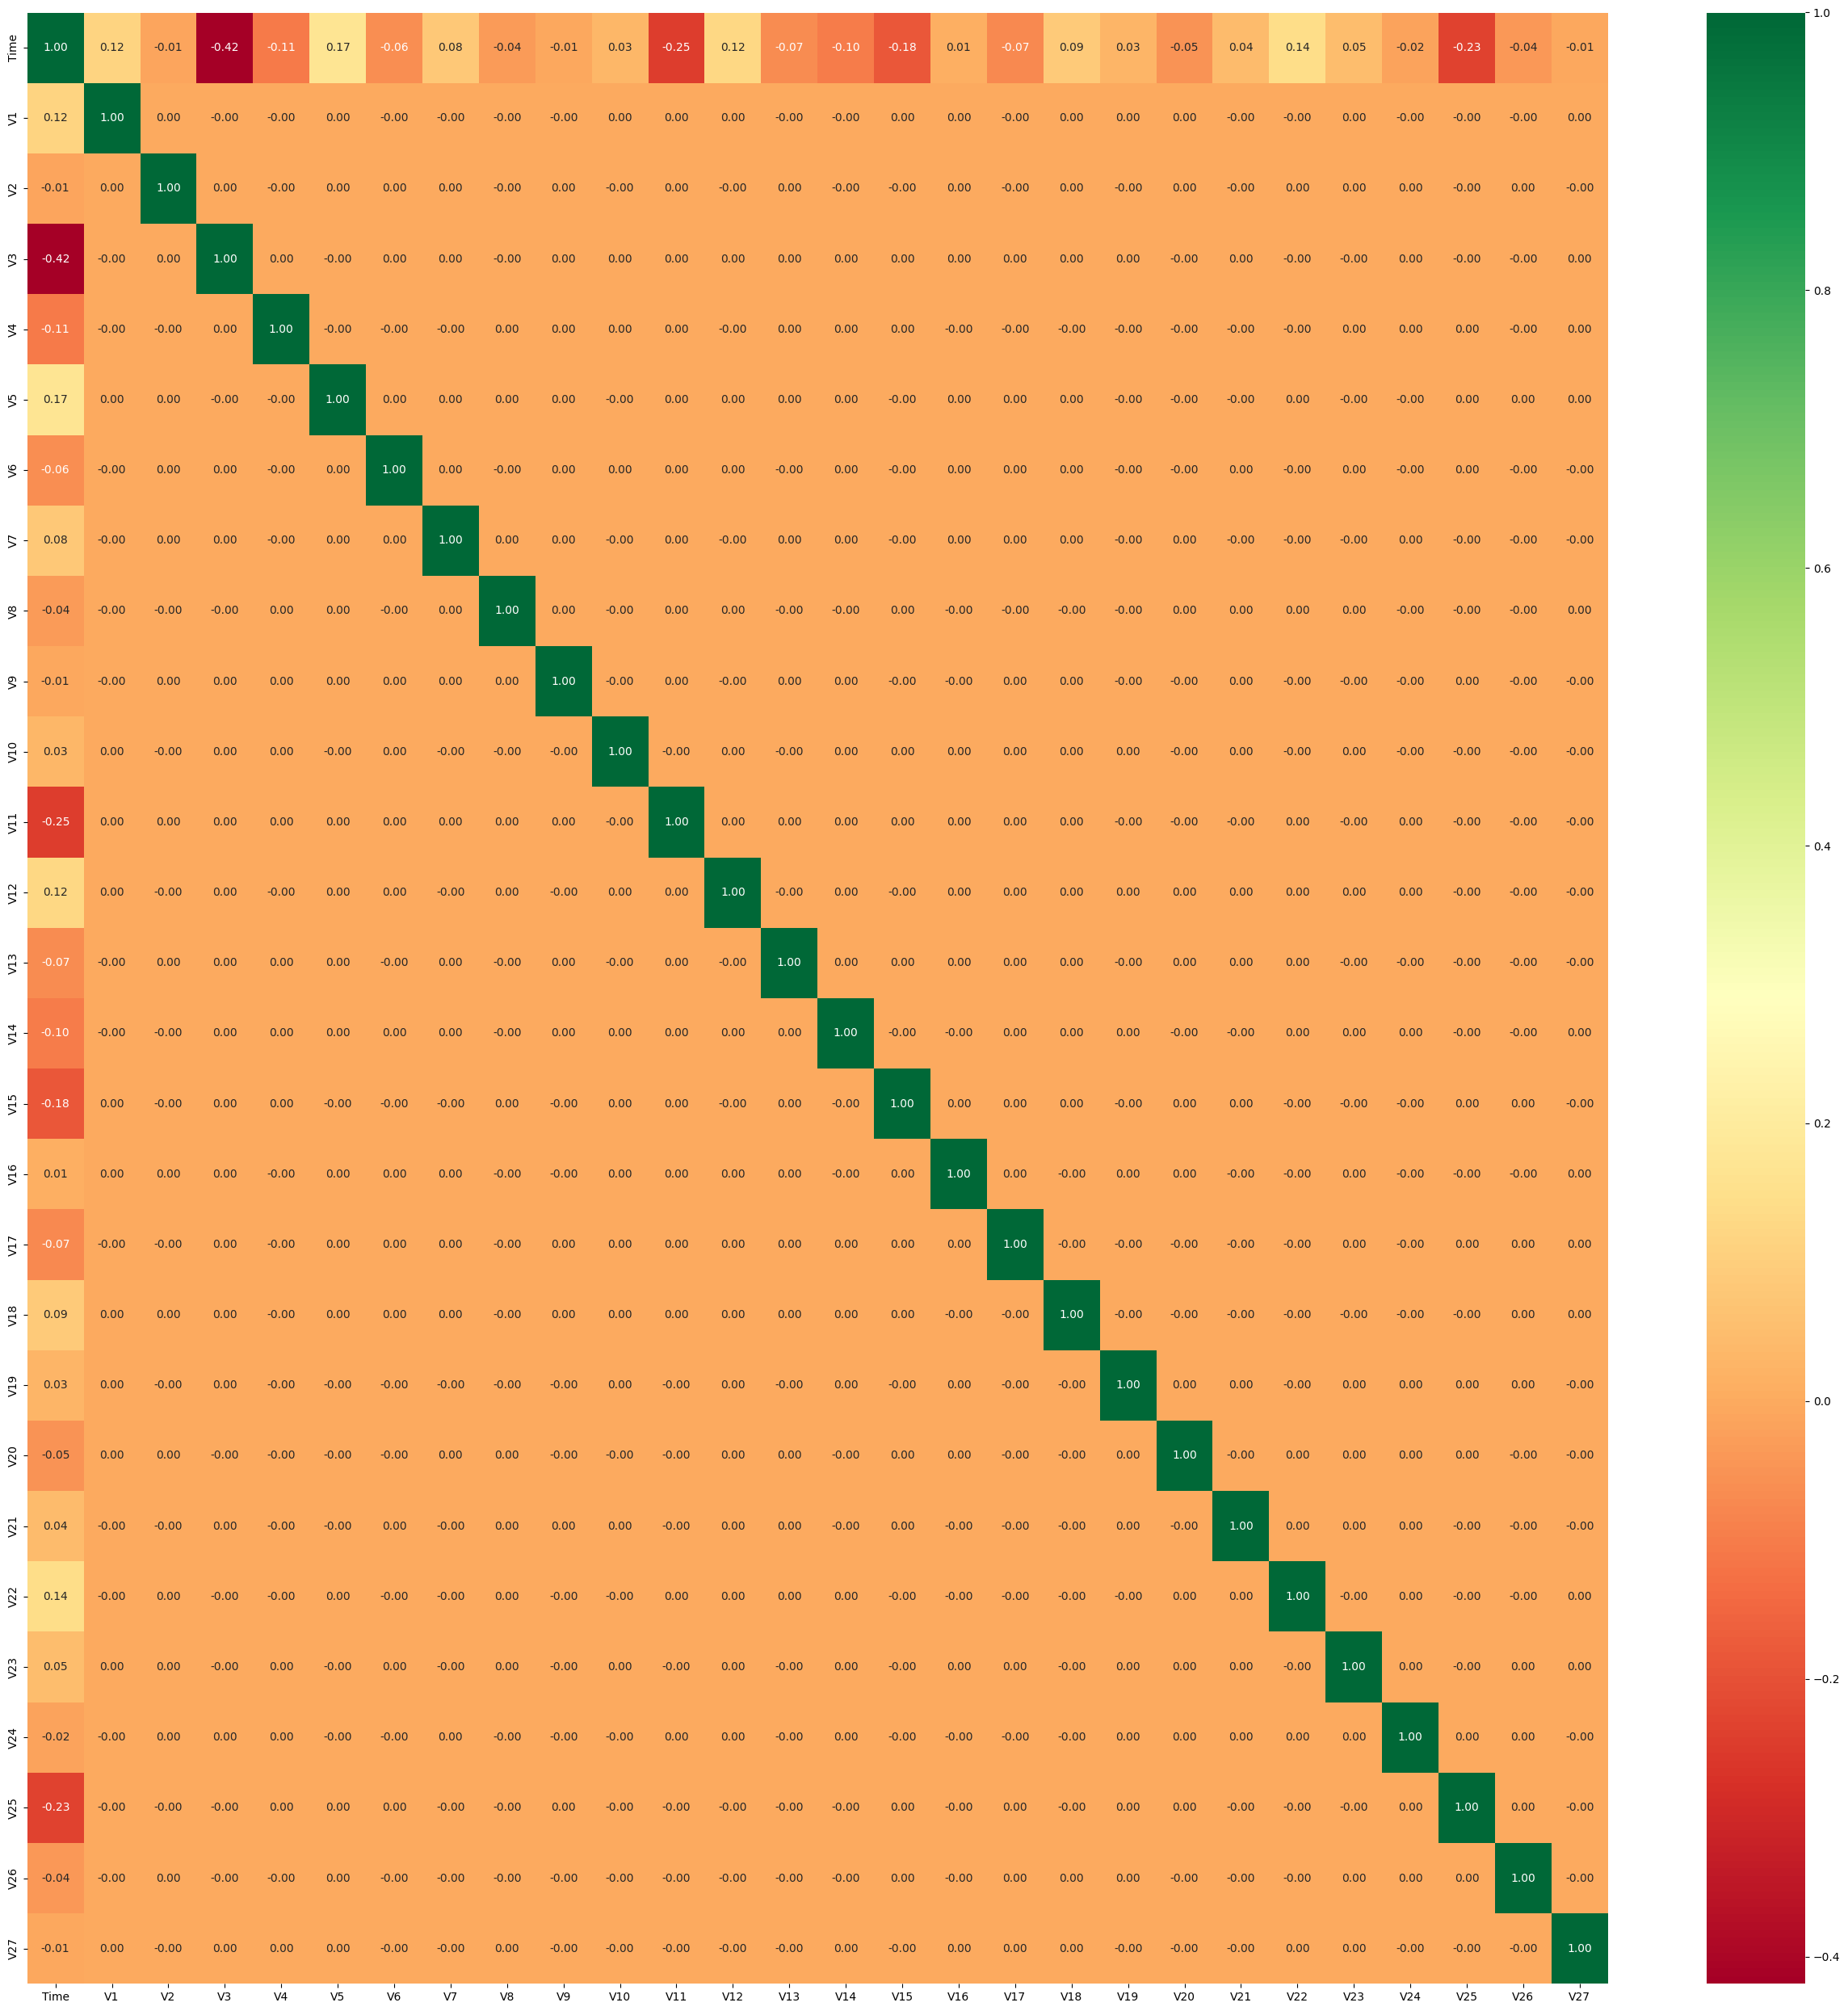

In [19]:
corrmat = data.corr()

# Select a subset of the top correlated features
top_corr_features = corrmat.index[:28]  # Adjust the number based on your dataset

# Plot heatmap for the selected features
plt.figure(figsize=(25, 25))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn", fmt=".2f", annot_kws={"size": 10})
plt.tight_layout()
plt.show()

Take some sample of the data

In [20]:
legit_sample = normal.sample(n=492,random_state=42)
print(legit_sample)
new_dataset = pd.concat([legit_sample,fraud],axis =0)
print(new_dataset)

            Time        V1        V2        V3        V4        V5        V6  \
138028   82450.0  1.314539  0.590643 -0.666593  0.716564  0.301978 -1.125467   
63099    50554.0 -0.798672  1.185093  0.904547  0.694584  0.219041 -0.319295   
73411    55125.0 -0.391128 -0.245540  1.122074 -1.308725 -0.639891  0.008678   
164247  116572.0 -0.060302  1.065093 -0.987421 -0.029567  0.176376 -1.348539   
148999   90434.0  1.848433  0.373364  0.269272  3.866438  0.088062  0.970447   
...          ...       ...       ...       ...       ...       ...       ...   
121938   76376.0 -1.525978  0.796226  1.172478 -0.947111  0.077071 -1.655590   
84533    60348.0 -0.705795  1.418016  0.993756  0.908646 -0.171163 -0.566892   
55840    47151.0  0.995185 -0.147746 -0.108914  1.168451  0.329676  1.182090   
70411    53857.0 -1.197741  3.166857 -3.476764  0.818768  1.310580 -0.445066   
95640    65405.0 -0.558983 -0.431438  1.893696 -1.783053 -1.752650  0.522665   

              V7        V8        V9  .

In [21]:
print(new_dataset.shape)

(984, 31)


Plot a line chart of means of each column of new_dataset

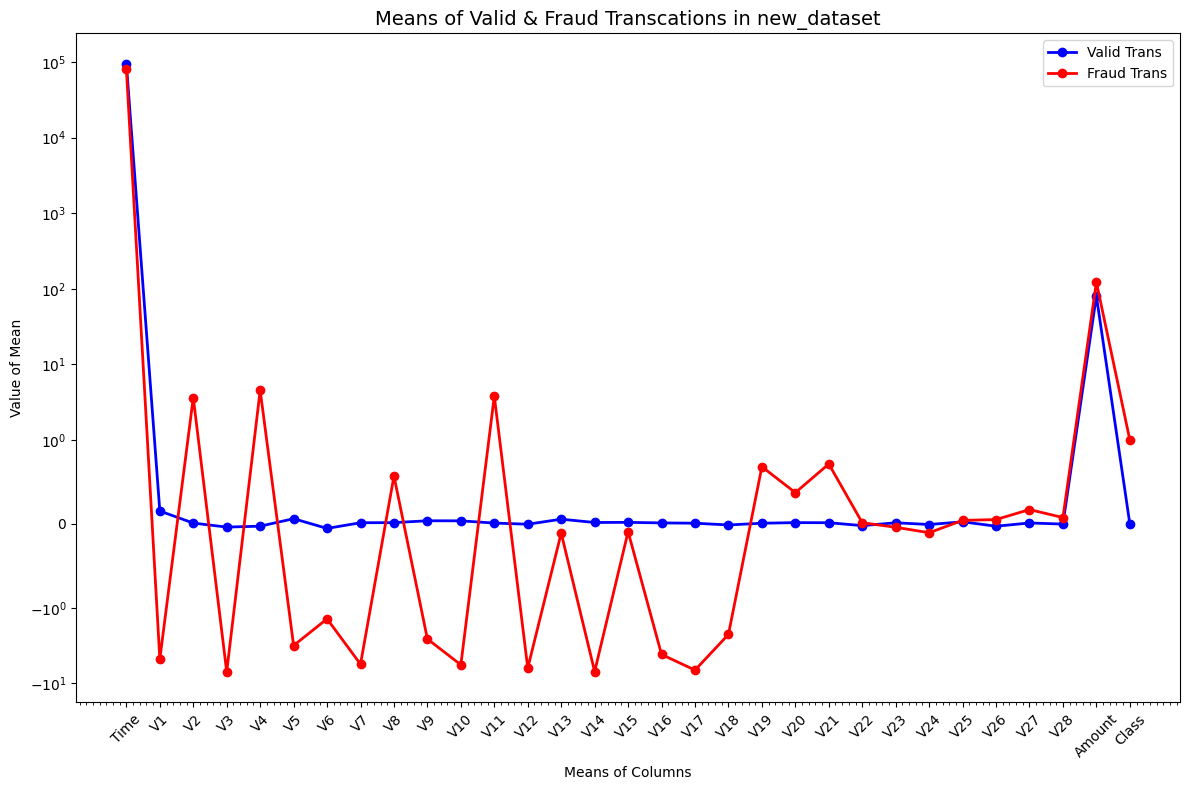

In [22]:
x = new_dataset[new_dataset['Class']==0].mean()
y = new_dataset[new_dataset['Class']==1].mean()
# print(x,y)
plt.figure(figsize=(12,8))
plt.plot(x, marker='o', linestyle='-', label='Valid Trans', color='blue', linewidth=2, markersize=6)
plt.plot(y, marker='o', linestyle='-', label='Fraud Trans', color='red', linewidth=2, markersize=6)
plt.title('Means of Valid & Fraud Transcations in new_dataset', fontsize=14)
plt.yscale('symlog', linthresh=1)
plt.minorticks_on()
plt.xlabel('Means of Columns')
plt.ylabel('Value of Mean')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

checking the nature of the dataset

In [23]:
print(new_dataset.groupby("Class").mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      95052.758130  0.153312  0.009649 -0.038029 -0.027323  0.061966   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0     -0.053962  0.013795  0.014911  0.037348  ...  0.015030  0.014059   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.020781  0.013223 -0.007257  0.024646 -0.027696  0.011070 -0.002305   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       80.348354  
1      122.211321  

[2 rows x 30

In [27]:
# #splitting the  dataset into features and target
#
input = data.drop(columns= 'Class',axis=1)
output= data['Class']
#


In [25]:
print(input)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [28]:
print(output)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [29]:
output.shape

(284807,)

In [31]:
# splitting the data into training and testing data

X_train, X_test , Y_train, Y_test = train_test_split(input,output,test_size=0.2,stratify=output,random_state=2)

print(input.shape, X_train.shape,X_test.shape)

(284807, 30) (227845, 30) (56962, 30)


In [32]:
# Define models
# Train and evaluate Logistic Regression model
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, Y_train)

logistic_train_pred = logistic_model.predict(X_train)
logistic_test_pred = logistic_model.predict(X_test)

logistic_train_accuracy = accuracy_score(Y_train, logistic_train_pred)
logistic_test_accuracy = accuracy_score(Y_test, logistic_test_pred)

print(f"Logistic Regression - Train Accuracy: {logistic_train_accuracy:.4f}")
print(f"Logistic Regression - Test Accuracy: {logistic_test_accuracy:.4f}")

Logistic Regression - Train Accuracy: 0.9992
Logistic Regression - Test Accuracy: 0.9994


In [33]:

new_data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/sample data credit card.csv")

new_predictions = logistic_model.predict(new_data)
print(new_predictions)

[0 0 0 ... 0 0 0]


In [34]:
unique_predictions = np.unique(new_predictions)
print("Unique predictions:", unique_predictions)

Unique predictions: [0 1]


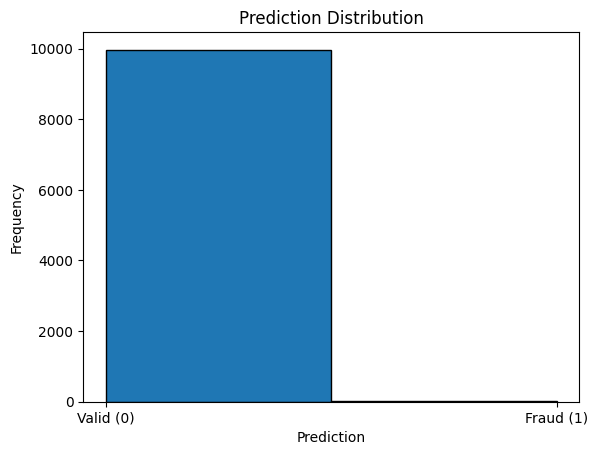

In [35]:

plt.hist(new_predictions, bins=2, edgecolor='black')
plt.xticks([0, 1], ['Valid (0)', 'Fraud (1)'])
plt.xlabel("Prediction")
plt.ylabel("Frequency")
plt.title("Prediction Distribution")
plt.show()

In [36]:
# Initialize counters
count_0 = 0
count_1 = 0

for pred in new_predictions:
    if pred == 0:
        count_0 += 1
    elif pred == 1:
        count_1 += 1

print(f"Valid (0): {count_0}, Fraud (1): {count_1}")

Valid (0): 9966, Fraud (1): 33
